Image Compression via SVD

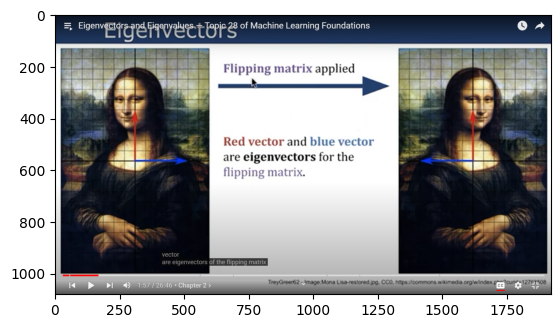

In [8]:
from PIL import Image #Python Imaging Library
import matplotlib.pyplot as plt

# Open the image
img = Image.open(r'C:\Users\Asus\OneDrive\Pictures\Screenshots\Screenshot 2024-03-02 082601.png')

# Display the image
plt.imshow(img)
plt.show()


Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:



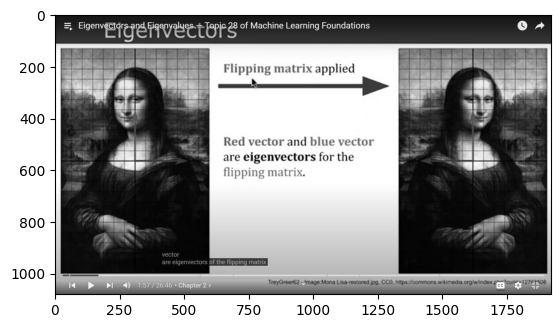

In [9]:
imggray = img.convert('LA') # L' channel represents the grayscale intensity while the 'A' channel represents the alpha (transparency) channel
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data:

In [11]:
import numpy as np

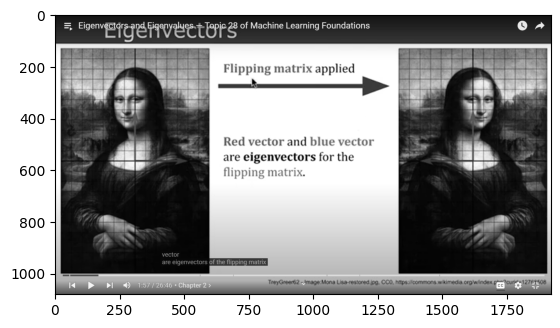

In [12]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image:

In [13]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag( λ ) so too are singular values, by convention, arranged in descending order in  D  (or, in this code, diag( σ )). Thus, the first left-singular vector of  U  and first right-singular vector of  V  may represent the most prominent feature of the image:

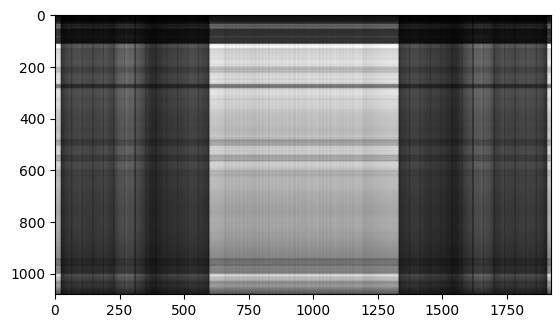

In [14]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality:

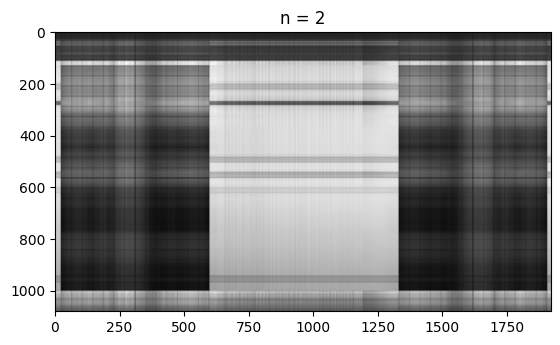

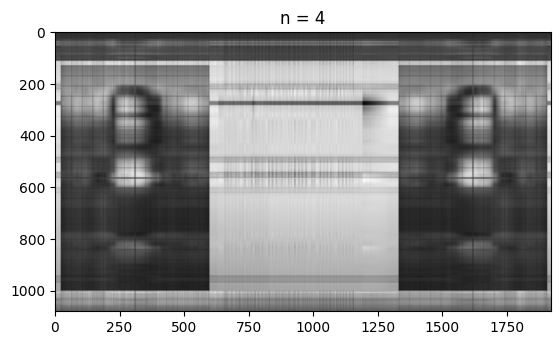

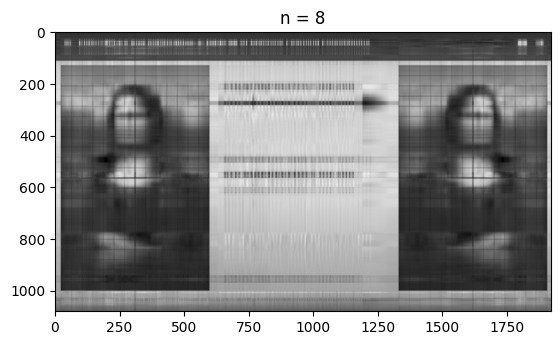

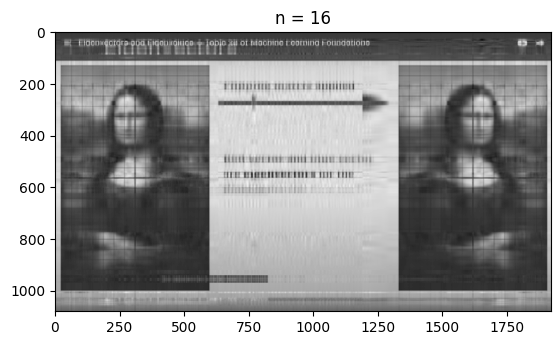

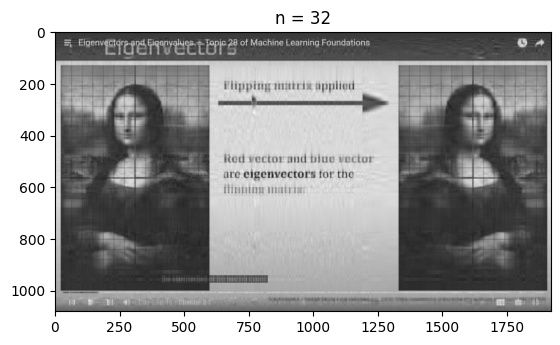

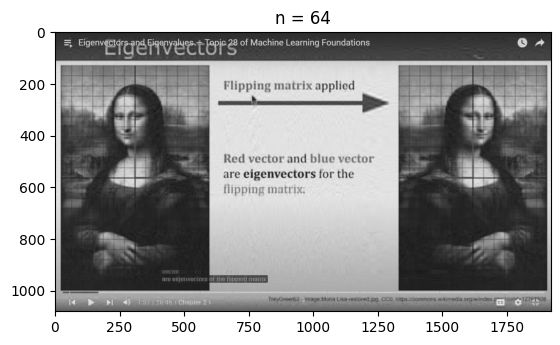

In [23]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [24]:
imgmat.shape

(1080, 1920)

In [25]:
full_representation = 1080*1920
full_representation

2073600

In [26]:
svd64_rep = 64*1080 + 64 + 64*1920
svd64_rep

192064

In [27]:
svd64_rep/full_representation

0.09262345679012346